In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
price_data = pd.read_excel('airtel stock price data.xlsx')
price_data.head()

,Date,Open,High,Low,Close,Volume,high-low,open-close
0,2020-05-26,572.0,576.45,557.55,559.25,76497320,18.9,12.75
1,2020-05-22,597.0,597.40,587.00,593.20,11416299,10.4,3.80
2,2020-05-21,590.5,604.50,585.40,594.55,20292652,19.1,-4.05
3,2020-05-20,605.0,612.00,588.60,594.05,35744408,23.4,10.95
4,2020-05-19,558.5,603.50,557.00,598.80,71909586,46.5,-40.30


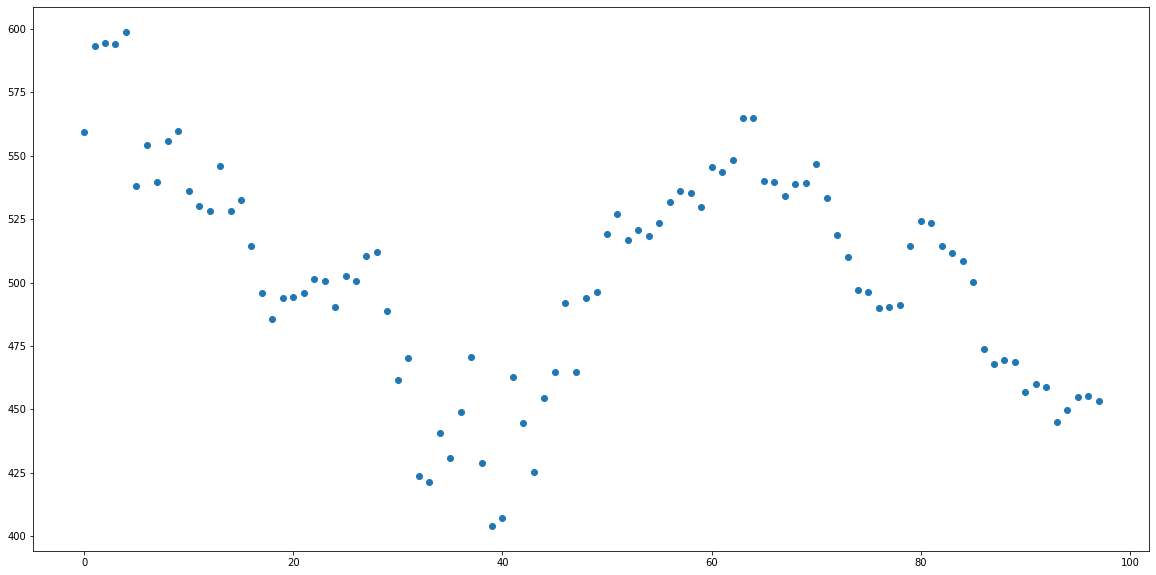

In [4]:
plt.figure(figsize=(20,10))

plt.scatter(x = price_data.index , y = price_data.Close)


In [5]:
from sklearn.model_selection import train_test_split
import datetime as dt
price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data['Date']=price_data['Date'].map(dt.datetime.toordinal)

In [56]:
features = ['Date','Open' , 'High' , 'Low','Volume']
X = price_data[features]
y = price_data['Close']
X_train,X_test,y_train,_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [57]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

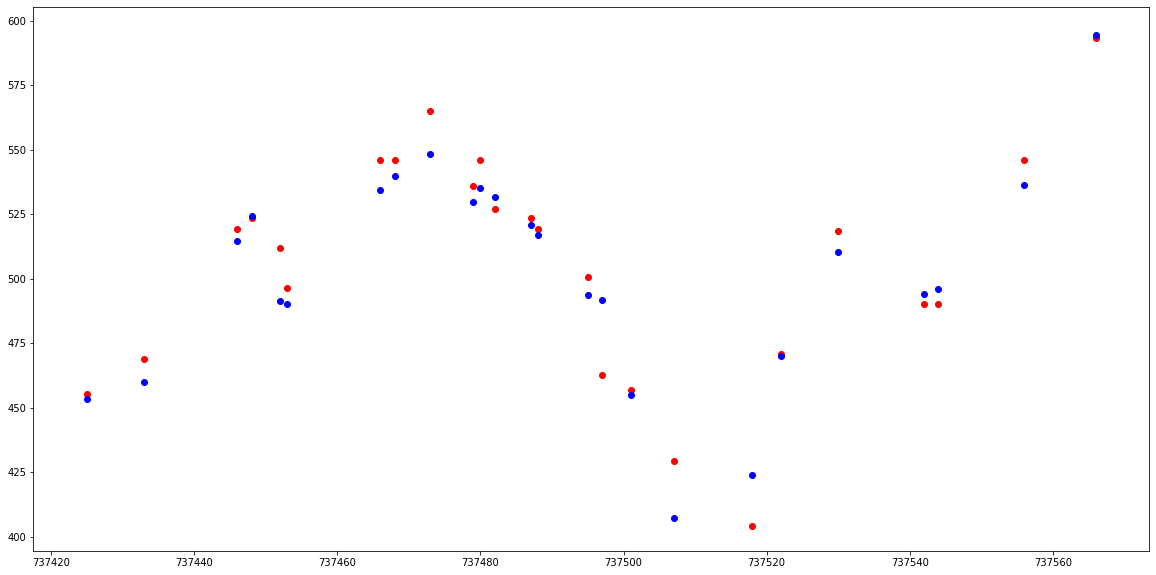

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(x = X_test.Date , y= regressor.predict(X_test),color = "r")
plt.scatter(x = X_test.Date, y = y_test, color = 'b')

In [59]:
regressor.score(X_test,y_test)
 

0.9231719340446662

In [60]:
X.Date.head()

0    737571
1    737567
2    737566
3    737565
4    737564
Name: Date, dtype: int64

In [61]:
X.head()

,Date,Open,High,Low,Volume
0,737571,572.0,576.45,557.55,76497320
1,737567,597.0,597.40,587.00,11416299
2,737566,590.5,604.50,585.40,20292652
3,737565,605.0,612.00,588.60,35744408
4,737564,558.5,603.50,557.00,71909586


In [65]:
 regressor.predict([[737572,561.05,565.40,554.00,172648871]])

array([559.25])